C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


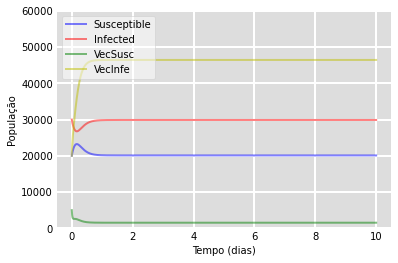

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


# Total population, H.
H = 50000
# Initial number of infected and recovered individuals, I0 and R0.
I0 = 30000

VI0 = 20000
VS0 = 5000
# Everyone else, S0, is susceptible to infection initially.
S0 = H - I0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
b, a, p, c, q, m_s, m_i, n, k = 3, 16, 0.3, 7, 0.9, 2, 2, 10, 60000

# A grid of time points (in days)
t = np.linspace(0, 10, 2000000)

# The SIR model differential equations.


def deriv(y, t, H, b, a, p, c, q, m_s, m_i, n, k):
    S, I, VS, VI = y
    dSdt = b*I - a*p*VI*S/(S+I)
    dIdt = a*p*VI*S/(S+I) - b*I
    dVIdt = -m_i*VI + a*VS*I*c*q/(S+I)
    dVSdt = n*(k - VS - VI)*(VS+VI)/k - m_s*VS - a*VS*I*c*q/(S+I)
    return dSdt, dIdt, dVSdt, dVIdt

# Initial conditions vector
y0 = S0, I0, VS0, VI0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(H, b, a, p, c, q, m_s, m_i, n, k))
S, I, VS, VI = ret.T
#print(ret.T)
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, VS, 'g', alpha=0.5, lw=2, label='VecSusc')
ax.plot(t, VI, 'y', alpha=0.5, lw=2, label='VecInfe')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_ylim(0,60000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


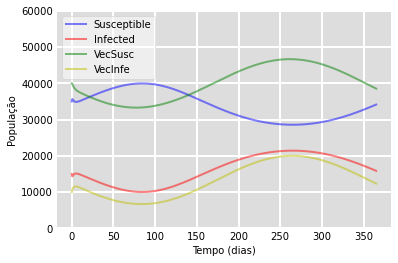

In [1]:
def k_anual(x):
    kmax = 100000
    k0 = 60000
    dia0 = 80
    y = math.pi + (x-dia0)*2*math.pi/365
    return (kmax + k0 + (kmax-k0)*math.cos(y))/2

# Total population, H.
H = 50000
# Initial number of infected and recovered individuals, I0 and R0.
I0 = 15000

VI0 = 10000
VS0 = 40000
# Everyone else, S0, is susceptible to infection initially.
S0 = H - I0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
b, a, p, c, q, m_s, m_i, n, k = 1.6, 5, 0.6, 1, 0.2, 1, 1, 3, 50000

# A grid of time points (in days)
t = np.linspace(0, 365, 2000000)

# The SIR model differential equations.
def derivK(y, t, H, b, a, p, c, q, m_s, m_i, n, k):
    S, I, VS, VI = y
    dSdt = b*I - a*p*VI*S/(S+I)
    dIdt = a*p*VI*S/(S+I) - b*I
    dVIdt = -m_i*VI + a*VS*I*c*q/(S+I)
    dVSdt = n*(k_anual(t) - VS - VI)*(VS+VI)/k_anual(t) - m_s*VS - a*VS*I*c*q/(S+I)
    return dSdt, dIdt, dVSdt, dVIdt

# Initial conditions vector
y0 = S0, I0, VS0, VI0
# Integrate the SIR equations over the time grid, t.
ret = odeint(derivK, y0, t, args=(H, b, a, p, c, q, m_s, m_i, n, k))
S, I, VS, VI = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, VS, 'g', alpha=0.5, lw=2, label='VecSusc')
ax.plot(t, VI, 'y', alpha=0.5, lw=2, label='VecInfe')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_ylim(0,60000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()